0) Colab 구글계정 생성

1) 구글드라이브 -> 내 드라이브 ->  Colab Notebooks 폴더 -> eTL 업로드 된 폴더 "IAB_Challenge" 업로드


2) "IAB_Challenge" 폴더 내 "IAB_Challenge_Skeleton.ipynb" 실행


3-1) 파일명 수정 -> "학번_이름.ipynb" ex) 202012345_GilDongHong.ipynb

3-2) 맨 첫 줄 ID 수정 -> "학번_이름" ex) ID = "202012345_GilDongHong"


4) 모델 학습 완료 후,  model_학번_이름.pth, 학번_이름.ipynb 두 파일을 압축한 202012345_GilDongHong.zip 파일을 eTL에 제출


In [ ]:
ID = ""
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
import os
import time
import torch
import patoolib
import numpy as np
import torch.nn as nn
import torchvision
import torch.optim as optim
from google.colab import drive
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torchvision.io import read_image
import torchvision.transforms as transforms

drive.mount('/content/drive')
CHLNG_PATH = "/content/drive/MyDrive/Colab Notebooks/IAB_Challenge/"
TRAIN_DIR = "event_img/event_img_train"
VAL_DIR = "event_img/event_img_val"
MODEL_PATH = os.path.join(CHLNG_PATH, f"model_{ID}.pth")
print(os.path.abspath(os.path.curdir))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [ ]:
try:
  patoolib.extract_archive(os.path.join(CHLNG_PATH, "event_img.zip"), outdir=CHLNG_PATH)
except:
  print(f"Already extracted")

Already extracted


In [ ]:
class SportsDataset(Dataset):
  def __init__(self, img_dir, transform=None):
    self.img_dir = img_dir
    self.classes = []
    self.img_path = []

    for class_ in os.listdir(self.img_dir):
      if '.' in class_:
        continue
      self.classes.append(class_)
      for img_ in os.listdir(os.path.join(self.img_dir, class_)):
        if img_[-3:] != 'jpg':
          continue
        self.img_path.append(os.path.join(self.img_dir, class_, img_))

    self.num_samples = len(self.img_path)
    self.transform = transform
    self.class_to_label = {k: v for k, v in zip(self.classes, range(len(self.classes)))}

  def __len__(self):
    return self.num_samples

  def __getitem__(self, idx):
    image = read_image(self.img_path[idx])
    if self.transform:
      image = self.transform(image.type(torch.float))

    label = self.class_to_label[str(self.img_path[idx]).split('/')[-2]]
    return image, label

channel_means = [119.1102, 123.3985, 114.8211]
channel_stds = [61.8950, 60.7454, 67.1402]

train_transform = transforms.Compose([
        transforms.Resize(size=(128, 128), antialias=True),
        transforms.Normalize(channel_means, channel_stds)
])

batch_size = 32
trainset = SportsDataset(img_dir=os.path.join(CHLNG_PATH, TRAIN_DIR), transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
classes = trainset.classes

test_channel_means = [119.2347, 122.6966, 118.3286]
test_stds = [62.6977, 61.2758, 67.4875]

test_transform = transforms.Compose([
          transforms.Resize(size=(128, 128), antialias=True),
          transforms.Normalize(test_channel_means, test_stds)
])

testset = SportsDataset(img_dir=os.path.join(CHLNG_PATH, VAL_DIR), transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testset.class_to_label = trainset.class_to_label

print(f"The number of train samples: {trainset.num_samples}")
print(f"256th img path: {trainset.img_path[256]}")
print(f"Its normalized values: {trainset[256]}\nShape: {trainset[256][0].shape}")
print(f"Label name to the index mapping: {trainset.class_to_label}")

FileNotFoundError: ignored

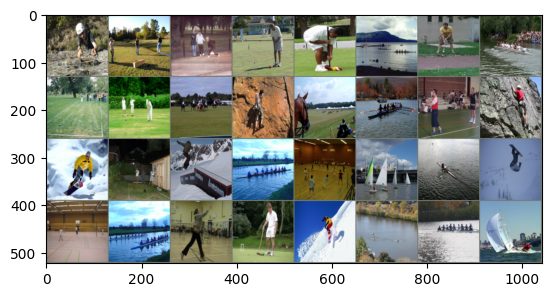

RockClimbing    croquet         bocce           croquet         croquet         rowing          croquet         rowing         
bocce           croquet         polo            RockClimbing    polo            rowing          badminton       RockClimbing   
snowboarding    bocce           snowboarding    rowing          badminton       sailing         rowing          snowboarding   
badminton       rowing          badminton       croquet         snowboarding    rowing          rowing          sailing        


In [ ]:
def imshow(img):
    img = (img * torch.Tensor(channel_stds).view(-1, 1, 1)) + torch.Tensor(channel_means).view(-1, 1, 1)  # un-normalize
    npimg = img.type(torch.uint8).numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
nrow = 8
imshow(torchvision.utils.make_grid(images, nrow=nrow))

# print labels
for i in range(int(batch_size/nrow)):
  print(' '.join(f'{classes[labels[i*nrow + j]]:15s}' for j in range(nrow)))

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        """
        # TODO:: Build your own model here

        """

    def forward(self, x):
        """
        # TODO::
        """
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Net().to(device)
print(device)

cuda


In [ ]:
def chk_acc(type_: str, dataloader):
  net.eval()
  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
    for idx, data in enumerate(dataloader):
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images.to(device))
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

  print(f'Accuracy of the network on the {total} {type_} images: {100 * correct // total} %')
  net.train()
  return 100 * correct // total

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-3, weight_decay=1e-4)

print_interval = 10
num_epoch = 5
best_acc = 0
for epoch in range(num_epoch):  # loop over the dataset multiple times
    t_ = time.time()

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % print_interval == print_interval-1:    # print every print_interval mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / print_interval:.3f} e_t: {(time.time() - t_):.2f}s')
            running_loss = 0.0
            t_ = time.time()
    chk_acc(type_="train", dataloader=trainloader)
    cur_acc = chk_acc(type_="test", dataloader=testloader)

    # save the best model
    if best_acc < cur_acc:
      best_acc = cur_acc
      torch.save(net.state_dict(), MODEL_PATH)

print('Finished Training')

[1,    10] loss: 2.070 e_t: 68.51s
[1,    20] loss: 2.030 e_t: 60.08s
[1,    30] loss: 2.062 e_t: 66.66s
[1,    40] loss: 1.908 e_t: 55.41s
Accuracy of the network on the 1250 train images: 23 %
Accuracy of the network on the 154 test images: 27 %
[2,    10] loss: 1.859 e_t: 7.84s
[2,    20] loss: 1.849 e_t: 5.40s
[2,    30] loss: 1.725 e_t: 6.86s
[2,    40] loss: 1.816 e_t: 5.17s
Accuracy of the network on the 1250 train images: 38 %
Accuracy of the network on the 154 test images: 35 %
[3,    10] loss: 1.633 e_t: 12.75s
[3,    20] loss: 1.586 e_t: 8.76s
[3,    30] loss: 1.548 e_t: 5.82s
[3,    40] loss: 1.509 e_t: 5.98s
Accuracy of the network on the 1250 train images: 45 %
Accuracy of the network on the 154 test images: 44 %
[4,    10] loss: 1.535 e_t: 5.77s
[4,    20] loss: 1.456 e_t: 6.84s
[4,    30] loss: 1.273 e_t: 7.06s
[4,    40] loss: 1.143 e_t: 4.86s
Accuracy of the network on the 1250 train images: 54 %
Accuracy of the network on the 154 test images: 48 %
[5,    10] loss: 1.

In [ ]:
net.load_state_dict(torch.load(MODEL_PATH))
chk_acc(type_="test", dataloader=testloader)

Accuracy of the network on the 154 test images: 54 %


54

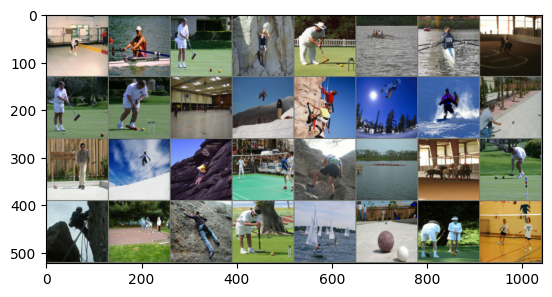

GroundTruth: 
bocce           rowing          croquet         RockClimbing    croquet         rowing          rowing          polo           
croquet         croquet         badminton       snowboarding    RockClimbing    snowboarding    snowboarding    bocce          
bocce           snowboarding    RockClimbing    badminton       RockClimbing    rowing          polo            croquet        
RockClimbing    bocce           RockClimbing    croquet         sailing         bocce           croquet         badminton      

Predicted: 
badminton       rowing          croquet         rowing          badminton       rowing          rowing          polo           
croquet         croquet         badminton       snowboarding    snowboarding    snowboarding    snowboarding    badminton      
badminton       snowboarding    RockClimbing    badminton       RockClimbing    rowing          polo            croquet        
badminton       croquet         RockClimbing    polo            sailing      

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images, nrow=nrow))
print('GroundTruth: ')
for i in range(int(batch_size/nrow)):
  print(' '.join(f'{classes[labels[i*nrow + j]]:15s}' for j in range(nrow)))

outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('\nPredicted: ')
for i in range(int(batch_size/nrow)):
  print(' '.join(f'{classes[predicted[i*nrow + j]]:15s}' for j in range(nrow)))

In [ ]:
# prepare to count predictions for each test_classes
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each classes
        for label, prediction in zip(labels.to(device), predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: snowboarding is 89.5 %
Accuracy for class: sailing is 84.2 %
Accuracy for class: rowing is 60.0 %
Accuracy for class: RockClimbing is 36.8 %
Accuracy for class: polo  is 50.0 %
Accuracy for class: croquet is 47.8 %
Accuracy for class: bocce is 7.7 %
Accuracy for class: badminton is 44.4 %


In [ ]:
""" DO NOT RUN THIS CELL!

TEST_DIR = "event_img/event_img_test"  # Do not use this
testset = SportsDataset(img_dir=os.path.join(CHLNG_PATH, TEST_DIR), transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testset.class_to_label = trainset.class_to_label
net.load_state_dict(torch.load(MODEL_PATH))
chk_acc(type_="test", dataloader=testloader)
"""

' DO NOT RUN THIS CELL! \n\nTEST_DIR = "event_img/event_img_test"  # Do not use this \ntestset = SportsDataset(img_dir=os.path.join(CHLNG_PATH, TEST_DIR), transform=test_transform)\ntestloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,\n                                          shuffle=True, num_workers=2)\ntestset.class_to_label = trainset.class_to_label\nnet.load_state_dict(torch.load(MODEL_PATH))\nchk_acc(type_="test", dataloader=testloader)\n'